In [1]:
import pandas as pd
import pymongo
import json
import seaborn as sns
import datetime as dt
import ipywidgets as widgets
import cache_magic
import geopandas as gpd
import matplotlib.pyplot as plt

%cache magic is now registered in ipython


In [2]:
def get_data():
    
    with open("local/pass.json") as file:
        file = json.loads(file.read())
        connection_string = file.get('connection_string')
        client = pymongo.MongoClient(
            connection_string)
        db = client["femicide"]
        df = pd.DataFrame(db['master'].find())
        
    return df

In [3]:
sns.set_style("darkgrid")

In [4]:
df = get_data()
df

,_id,iso3,year,continent,region,country,fem_pop,femicide_count,femicide_rate,suicide_count,suicide_rate,gnipc,gini,mat_deaths
0,64e6598a800d040d8def7dc2,ABW,1990-01-01,America,Caribbean,Aruba,33480.0,0.0,0.000000,NaN,NaN,11570.0,NaN,NaN
1,64e6598a800d040d8def7dc3,ABW,1991-01-01,America,Caribbean,Aruba,34657.0,NaN,NaN,NaN,NaN,12560.0,NaN,NaN
2,64e6598a800d040d8def7dc4,ABW,1992-01-01,America,Caribbean,Aruba,35941.0,NaN,NaN,NaN,NaN,13610.0,NaN,NaN
3,64e6598a800d040d8def7dc5,ABW,1993-01-01,America,Caribbean,Aruba,37137.0,NaN,NaN,NaN,NaN,14640.0,NaN,NaN
4,64e6598a800d040d8def7dc6,ABW,1994-01-01,America,Caribbean,Aruba,38437.0,NaN,NaN,NaN,NaN,16060.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7175,64e6598a800d040d8def99c9,ZWE,2018-01-01,Africa,Eastern Africa,Zimbabwe,7966181.0,163.0,2.046150,693.0,8.7,1550.0,NaN,1700.0
7176,64e6598a800d040d8def99ca,ZWE,2019-01-01,Africa,Eastern Africa,Zimbabwe,8122618.0,167.0,2.055987,715.0,8.8,1450.0,50.3,1900.0
7177,64e6598a800d040d8def99cb,ZWE,2020-01-01,Africa,Eastern Africa,Zimbabwe,8284447.0,146.0,1.762339,NaN,NaN,1460.0,NaN,1700.0
7178,64e6598a800d040d8def99cc,ZWE,2021-01-01,Africa,Eastern Africa,Zimbabwe,8449834.0,158.0,1.869859,NaN,NaN,1530.0,NaN,NaN


<AxesSubplot: xlabel='year', ylabel='femicide_count'>

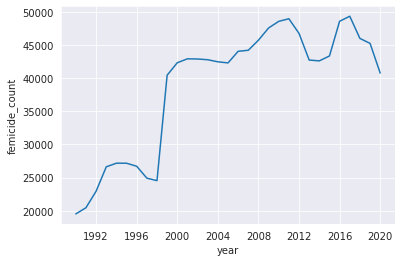

In [5]:
df_fem_sum = df.groupby('year')['femicide_count'].sum()
df_fem_sum = df_fem_sum[0:-2]
sns.lineplot(data=df_fem_sum)

<AxesSubplot: xlabel='year', ylabel='suicide_count'>

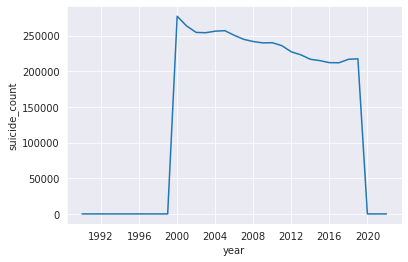

In [6]:
df_suic_sum = df.groupby('year')['suicide_count'].sum()
#df_fem_sum = df_fem_sum[0:-2]
sns.lineplot(data=df_suic_sum)

In [7]:
df_pre = df[df['year'].dt.year < 2000]
df_pre = df_pre.dropna(subset='femicide_count')
df_pre

,_id,iso3,year,continent,region,country,fem_pop,femicide_count,femicide_rate,suicide_count,suicide_rate,gnipc,gini,mat_deaths
0,64e6598a800d040d8def7dc2,ABW,1990-01-01,America,Caribbean,Aruba,33480.0,0.0,0.000000,NaN,NaN,11570.0,NaN,NaN
5,64e6598a800d040d8def7dc7,ABW,1995-01-01,America,Caribbean,Aruba,39724.0,0.0,0.000000,NaN,NaN,16930.0,NaN,NaN
9,64e6598a800d040d8def7dcb,ABW,1999-01-01,America,Caribbean,Aruba,45050.0,1.0,2.219731,NaN,NaN,18320.0,NaN,NaN
99,64e6598a800d040d8def7e25,AIA,1991-01-01,America,Caribbean,Anguilla,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
100,64e6598a800d040d8def7e26,AIA,1993-01-01,America,Caribbean,Anguilla,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6859,64e6598a800d040d8def988d,VGB,1999-01-01,America,Caribbean,British Virgin Islands,9524.0,1.0,10.499239,NaN,NaN,NaN,NaN,NaN
6890,64e6598a800d040d8def98ac,VIR,1997-01-01,America,Caribbean,United States Virgin Islands,56287.0,6.0,10.918819,NaN,NaN,NaN,NaN,NaN
6891,64e6598a800d040d8def98ad,VIR,1998-01-01,America,Caribbean,United States Virgin Islands,56489.0,2.0,3.595797,NaN,NaN,NaN,NaN,NaN
6892,64e6598a800d040d8def98ae,VIR,1999-01-01,America,Caribbean,United States Virgin Islands,56628.0,4.0,7.114210,NaN,NaN,NaN,NaN,NaN


<AxesSubplot: xlabel='year', ylabel='Count'>

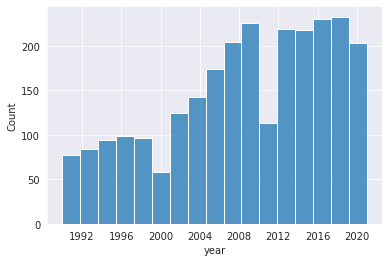

In [8]:
df_hist = df.dropna(subset='femicide_count')
sns.histplot(data=df_hist['year'])

In [9]:
%cache gdf = gpd.read_file('/vsicurl/https://github.com/Tom-Whittington/Femicide_analysis/raw/main/county_shapes/WB_countries_Admin0_10m.shp')
gdf = gdf[['ISO_A3', 'geometry']]
gdf = gdf.rename(columns={ 'ISO_A3' : 'iso3'})
gdf

loading cached value for variable 'gdf'. Time since pickling  21 days, 7:11:08.733334


,iso3,geometry
0,IDN,"MULTIPOLYGON (((117.70361 4.16341, 117.70361 4..."
1,MYS,"MULTIPOLYGON (((117.70361 4.16341, 117.69711 4..."
2,CHL,"MULTIPOLYGON (((-69.51009 -17.50659, -69.50611..."
3,BOL,"POLYGON ((-69.51009 -17.50659, -69.51009 -17.5..."
4,PER,"MULTIPOLYGON (((-69.51009 -17.50659, -69.63832..."
...,...,...
246,UMI,"POLYGON ((-75.02432 18.41726, -75.02107 18.415..."
247,UMI,"POLYGON ((-162.06086 5.88719, -162.05761 5.882..."
248,UMI,"POLYGON ((-162.40018 6.44514, -162.38528 6.445..."
249,NZL,"MULTIPOLYGON (((-171.18566 -9.36126, -171.1883..."


In [10]:
df_fem_map = df.copy()
df_fem_map = df_fem_map[df_fem_map['year'].dt.year == 2015]
df_fem_map = df_fem_map.merge(gdf, on='iso3', how='left')
df_fem_map = df_fem_map.dropna(subset='geometry')
gdf = gpd.GeoDataFrame(df_fem_map, geometry='geometry', crs="EPSG:4326")
df_fem_map

,_id,iso3,year,continent,region,country,fem_pop,femicide_count,femicide_rate,suicide_count,suicide_rate,gnipc,gini,mat_deaths,geometry
0,64e6598a800d040d8def7ddb,ABW,2015-01-01,America,Caribbean,Aruba,54828.0,NaN,NaN,NaN,NaN,26180.0,NaN,NaN,"POLYGON ((-69.99694 12.57758, -69.93639 12.531..."
1,64e6598a800d040d8def7dfc,AFG,2015-01-01,Asia,Southern Asia,Afghanistan,16682054.0,93.0,0.560000,601.0,3.6,610.0,NaN,10000.0,"POLYGON ((74.54235 37.02167, 74.54742 37.01567..."
2,64e6598a800d040d8def7e1d,AGO,2015-01-01,Africa,Middle Africa,Angola,14248799.0,NaN,NaN,370.0,2.6,3880.0,NaN,3200.0,"MULTIPOLYGON (((13.07370 -4.63532, 13.06533 -4..."
3,64e6598a800d040d8def7e44,ALB,2015-01-01,Europe,Southern Europe,Albania,1435812.0,16.0,1.113664,46.0,3.2,4390.0,32.8,2.0,"POLYGON ((20.56715 41.87318, 20.54172 41.86158..."
4,64e6598a800d040d8def7e65,AND,2015-01-01,Europe,Southern Europe,Andorra,35557.0,0.0,0.000000,NaN,NaN,NaN,NaN,NaN,"POLYGON ((1.70701 42.50278, 1.69750 42.49446, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215,64e6598a800d040d8def9921,WSM,2015-01-01,Oceania,Polynesia,Samoa,99370.0,NaN,NaN,7.0,6.7,3930.0,NaN,3.0,"MULTIPOLYGON (((-172.20104 -13.59254, -172.197..."
217,64e6598a800d040d8def9963,YEM,2015-01-01,Asia,Western Asia,Yemen,14077389.0,NaN,NaN,605.0,4.3,1110.0,NaN,1600.0,"MULTIPOLYGON (((51.97861 18.99564, 51.98569 18..."
218,64e6598a800d040d8def9984,ZAF,2015-01-01,Africa,Southern Africa,South Africa,28721087.0,NaN,NaN,2843.0,9.9,6550.0,NaN,1700.0,"MULTIPOLYGON (((19.98145 -24.75249, 19.98641 -..."
219,64e6598a800d040d8def99a5,ZMB,2015-01-01,Africa,Eastern Africa,Zambia,8247891.0,NaN,NaN,313.0,3.8,1540.0,57.1,1000.0,"POLYGON ((32.92086 -9.40790, 32.92303 -9.46629..."


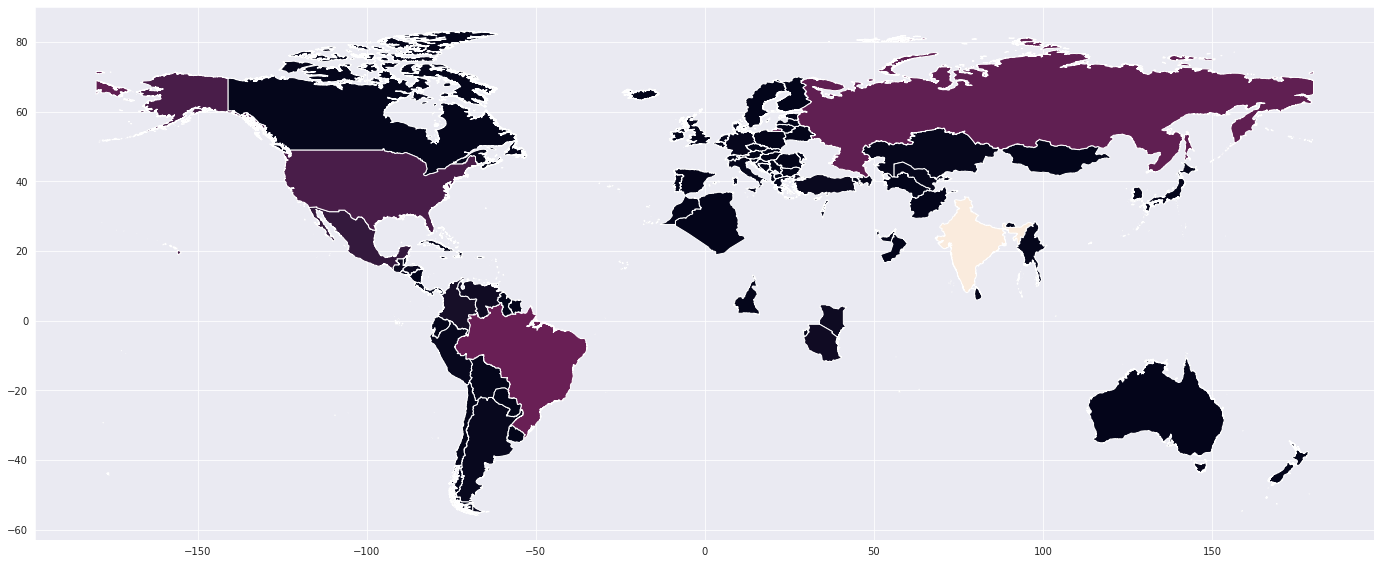

In [12]:
fig , ax = plt.subplots(figsize=(24, 17))
gdf.plot(column="femicide_count", ax=ax)
plt.show()